# RNN

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data = pd.read_csv("Google_Stock_Price_Train.csv")
test_data = pd.read_csv("Google_Stock_Price_Test.csv")
print(data.shape,test_data.shape)

(1258, 6) (20, 6)


In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train_data = data.iloc[:,1:2].values
train_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

train_data_scaled = sc.fit_transform(train_data)
train_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

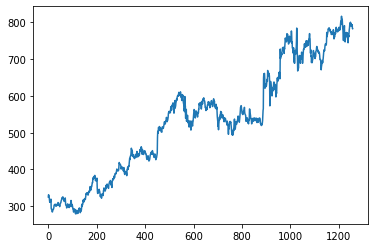

In [8]:
plt.plot(data["Open"])

In [12]:
#crerating dataframe with 60 timesteps and 1 output 

x_train = []
y_train = []

for i in range(60,1258):
    x_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
y_train.shape, x_train.shape

((1198,), (1198, 60))

In [16]:
x_train.shape

(1198, 60)

In [20]:
# reshaping training data (adding dimension)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
regressor = Sequential()

## Building LSTM Layers

In [24]:
# adding the first LSTM layers and dropout layers
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))# 20% of 50nurons will be ignored that is 10 nurons will be ignored

# adding the 2nd LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 3rd LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 4th LSTM layers and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=False))#we do not want any more sequence
regressor.add(Dropout(0.2))

#adding the output layers (fully connected layers)
regressor.add(Dense(units=1))

In [26]:
# compiling RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [27]:
# fitting the RNN to training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 27s 23ms/step - loss: 0.0408
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [=============

1198/1198 [==============================] - 41s 34ms/step - loss: 0.0016
Epoch 75/100
1198/1198 [==============================] - 41s 34ms/step - loss: 0.0016
Epoch 76/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0017
Epoch 77/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0015
Epoch 78/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0015
Epoch 79/100
1198/1198 [==============================] - 40s 33ms/step - loss: 0.0017
Epoch 80/100
1198/1198 [==============================] - 44s 37ms/step - loss: 0.0016
Epoch 81/100
1198/1198 [==============================] - 44s 37ms/step - loss: 0.0016
Epoch 82/100
1198/1198 [==============================] - 45s 37ms/step - loss: 0.0016
Epoch 83/100
1198/1198 [==============================] - 44s 37ms/step - loss: 0.0017
Epoch 84/100
1198/1198 [==============================] - 45s 38ms/step - loss: 0.0017
Epoch 85/100
1198/1198 [==============================] 

In [39]:
dataset_total = pd.concat([data["Open"],test_data["Open"]],axis=0)
inputs =  dataset_total[len(data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs) # 60 from train and 20 from test

80

In [40]:
#crerating dataframe with 60 timesteps and 1 output for test set as well

x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# prediction result

In [41]:
predict_stock_price = regressor.predict(x_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

# Visualising result

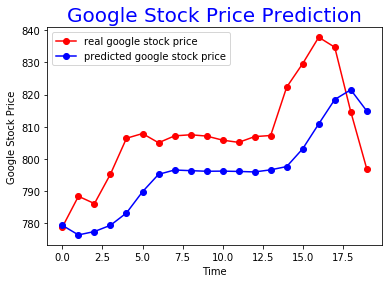

In [52]:
real_stock_price = test_data.iloc[:,1:2].values

plt.plot(real_stock_price,color="red",label="real google stock price",marker="o")
plt.plot(predict_stock_price,color="blue",label="predicted google stock price",marker="o")
plt.title("Google Stock Price Prediction",fontsize=20,color="blue")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()


# ========================END=================================